In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set()

## Load data
* SpO2_HR
* BP_HR
* Weight
* Messages (questions)

In [2]:
pulse_df = pd.read_excel("../data/SpO2_HR_Readings.xlsx")
bphr_df = pd.read_excel("../data/BP_HR_Readings.xlsx")
weight_df = pd.read_excel("../data/Weight_Readings.xlsx")
mess_df = pd.read_excel("../data/messages 6-22-16.xlsx")

## SpO2_HR

In [3]:
pulse_df.head()

,EndUserId,ReadingDate,SP02,HeartRate_SP02
0,5,2015-05-11 13:52:55,93,102
1,5,2015-05-13 14:18:14,92,106
2,5,2015-05-18 13:53:36,91,98
3,5,2015-05-20 13:43:05,90,88
4,5,2015-05-27 13:29:13,94,81


In [4]:
pulse_df.dtypes

EndUserId                  int64
ReadingDate       datetime64[ns]
SP02                       int64
HeartRate_SP02             int64
dtype: object

In [5]:
pulse_df['SPO2_read_date']=pulse_df['ReadingDate'].apply(lambda x: x.date())
pulse_df['SPO2_read_time']=pulse_df['ReadingDate'].apply(lambda x: x.time())
pulse_df.drop(['ReadingDate'],axis=1,inplace=True)

In [6]:
pulse_df.head()

,EndUserId,SP02,HeartRate_SP02,SPO2_read_date,SPO2_read_time
0,5,93,102,2015-05-11,13:52:55
1,5,92,106,2015-05-13,14:18:14
2,5,91,98,2015-05-18,13:53:36
3,5,90,88,2015-05-20,13:43:05
4,5,94,81,2015-05-27,13:29:13


## BP_HR

In [7]:
bphr_df.head()

,EndUserId,ReadingDate,Systolic,Diastolic,HeartRate
0,5,2015-05-11 13:56:47,117,89,94.0
1,5,2015-05-13 14:20:08,111,61,94.0
2,5,2015-05-18 13:55:05,155,134,91.0
3,5,2015-05-20 13:45:51,108,69,84.0
4,5,2015-05-27 13:30:28,96,70,77.0


In [8]:
bphr_df.dtypes

EndUserId               int64
ReadingDate    datetime64[ns]
Systolic                int64
Diastolic               int64
HeartRate             float64
dtype: object

In [9]:
bphr_df['BPHR_read_date']=bphr_df['ReadingDate'].apply(lambda x: x.date())
bphr_df['BPHR_read_time']=bphr_df['ReadingDate'].apply(lambda x: x.time())
bphr_df.drop(['ReadingDate'],axis=1,inplace=True)
bphr_df.head()

,EndUserId,Systolic,Diastolic,HeartRate,BPHR_read_date,BPHR_read_time
0,5,117,89,94.0,2015-05-11,13:56:47
1,5,111,61,94.0,2015-05-13,14:20:08
2,5,155,134,91.0,2015-05-18,13:55:05
3,5,108,69,84.0,2015-05-20,13:45:51
4,5,96,70,77.0,2015-05-27,13:30:28


## Weight

In [10]:
weight_df.head()

,EndUserId,ReadingDate,Weight
0,5,2015-05-11 13:57:36,168.9
1,5,2015-05-18 13:55:54,167.8
2,5,2015-05-27 13:31:32,168.2
3,5,2015-06-08 14:01:18,169.1
4,5,2015-06-10 13:54:47,167.5


In [11]:
weight_df['W_read_date']=weight_df['ReadingDate'].apply(lambda x: x.date())
weight_df['W_read_time']=weight_df['ReadingDate'].apply(lambda x: x.time())
weight_df.drop(['ReadingDate'],axis=1,inplace=True)
weight_df.head()

,EndUserId,Weight,W_read_date,W_read_time
0,5,168.9,2015-05-11,13:57:36
1,5,167.8,2015-05-18,13:55:54
2,5,168.2,2015-05-27,13:31:32
3,5,169.1,2015-06-08,14:01:18
4,5,167.5,2015-06-10,13:54:47


## Messages

In [12]:
mess_df.head()

,EndUserId,RespondedOn,Question,Response
0,40.0,2015-05-20 13:22:42,How are you feeling today?,Very well
1,40.0,2015-05-20 13:22:45,Have you changed medications since your last s...,Skip
2,40.0,2015-05-20 13:22:45,Have you fallen since the last screening visit...,Skip
3,40.0,2015-05-20 13:22:46,Have you been hospitalized or had an ER visit ...,Skip
4,40.0,2015-05-20 13:22:47,Have you changed dosage since your last screen...,Skip


In [13]:
mess_df['Resp_date']=mess_df['RespondedOn'].apply(lambda x: x.date())
#mess_df['Resp_time']=mess_df['RespondedOn'].apply(lambda x: x.time())
mess_df.drop(['RespondedOn'],axis=1,inplace=True)
mess_df.head()

,EndUserId,Question,Response,Resp_date
0,40.0,How are you feeling today?,Very well,2015-05-20
1,40.0,Have you changed medications since your last s...,Skip,2015-05-20
2,40.0,Have you fallen since the last screening visit...,Skip,2015-05-20
3,40.0,Have you been hospitalized or had an ER visit ...,Skip,2015-05-20
4,40.0,Have you changed dosage since your last screen...,Skip,2015-05-20


In [14]:
mess_df.stack()

0      EndUserId                                                   40
       Question                        How are you feeling today?    
       Response                                             Very well
       Resp_date                                           2015-05-20
1      EndUserId                                                   40
       Question     Have you changed medications since your last s...
       Response                                                  Skip
       Resp_date                                           2015-05-20
2      EndUserId                                                   40
       Question     Have you fallen since the last screening visit...
       Response                                                  Skip
       Resp_date                                           2015-05-20
3      EndUserId                                                   40
       Question     Have you been hospitalized or had an ER visit ...
       Response     

In [15]:
#mess_df.groupby(['EndUserId','Resp_date'])['Response'].aggregate('mean').unstack() #,columns='Question')

In [16]:
merge_df = pd.merge(bphr_df,weight_df,how='inner',left_on=['EndUserId','BPHR_read_date'],right_on=['EndUserId','W_read_date'])
merge_df.head()

,EndUserId,Systolic,Diastolic,HeartRate,BPHR_read_date,BPHR_read_time,Weight,W_read_date,W_read_time
0,5,117,89,94.0,2015-05-11,13:56:47,168.9,2015-05-11,13:57:36
1,5,155,134,91.0,2015-05-18,13:55:05,167.8,2015-05-18,13:55:54
2,5,96,70,77.0,2015-05-27,13:30:28,168.2,2015-05-27,13:31:32
3,5,113,93,72.0,2015-06-08,13:59:32,169.1,2015-06-08,14:01:18
4,5,144,90,91.0,2015-06-10,13:53:41,167.5,2015-06-10,13:54:47


In [17]:
merge_df = pd.merge(merge_df,pulse_df,how='inner',left_on=['EndUserId','BPHR_read_date'],right_on=['EndUserId','SPO2_read_date'])
merge_df.head()

,EndUserId,Systolic,Diastolic,HeartRate,BPHR_read_date,BPHR_read_time,Weight,W_read_date,W_read_time,SP02,HeartRate_SP02,SPO2_read_date,SPO2_read_time
0,5,117,89,94.0,2015-05-11,13:56:47,168.9,2015-05-11,13:57:36,93,102,2015-05-11,13:52:55
1,5,155,134,91.0,2015-05-18,13:55:05,167.8,2015-05-18,13:55:54,91,98,2015-05-18,13:53:36
2,5,96,70,77.0,2015-05-27,13:30:28,168.2,2015-05-27,13:31:32,94,81,2015-05-27,13:29:13
3,5,113,93,72.0,2015-06-08,13:59:32,169.1,2015-06-08,14:01:18,92,90,2015-06-08,13:54:52
4,5,144,90,91.0,2015-06-10,13:53:41,167.5,2015-06-10,13:54:47,92,95,2015-06-10,13:52:10


In [18]:
merge_df.insert(1,'measure_date',merge_df['BPHR_read_date'])
merge_df.drop(['W_read_date','BPHR_read_date','SPO2_read_date'],axis=1,inplace=True)
merge_df.head()

,EndUserId,measure_date,Systolic,Diastolic,HeartRate,BPHR_read_time,Weight,W_read_time,SP02,HeartRate_SP02,SPO2_read_time
0,5,2015-05-11,117,89,94.0,13:56:47,168.9,13:57:36,93,102,13:52:55
1,5,2015-05-18,155,134,91.0,13:55:05,167.8,13:55:54,91,98,13:53:36
2,5,2015-05-27,96,70,77.0,13:30:28,168.2,13:31:32,94,81,13:29:13
3,5,2015-06-08,113,93,72.0,13:59:32,169.1,14:01:18,92,90,13:54:52
4,5,2015-06-10,144,90,91.0,13:53:41,167.5,13:54:47,92,95,13:52:10


### Grouped data by ID
Now we have to get the time between each visit. We diff the column, then collect diffs greater than 12

In [19]:
merge_df.groupby(['EndUserId']).get_group(5)['measure_date']

0     2015-05-11
1     2015-05-18
2     2015-05-27
3     2015-06-08
4     2015-06-10
5     2015-06-15
6     2015-06-17
7     2015-06-22
8     2015-06-24
9     2015-06-29
10    2015-07-01
11    2015-07-06
12    2015-07-08
13    2015-07-13
14    2015-07-15
15    2015-07-22
16    2015-07-27
17    2015-07-29
18    2015-08-03
19    2015-08-05
20    2015-08-12
21    2015-08-17
22    2015-08-19
23    2015-09-09
24    2015-09-14
25    2015-09-16
26    2015-09-21
27    2015-09-23
28    2015-09-28
29    2015-09-30
30    2015-10-05
31    2015-10-14
32    2015-10-19
33    2015-10-26
34    2015-10-28
35    2015-11-02
36    2015-11-04
37    2015-11-11
38    2015-11-18
39    2015-12-16
40    2015-12-22
41    2016-02-17
42    2016-02-24
43    2016-03-02
44    2016-03-09
45    2016-03-30
46    2016-04-06
47    2016-04-13
48    2016-04-20
49    2016-04-27
50    2016-05-11
Name: measure_date, dtype: object

In [20]:
merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff().describe()

count                        50
mean            7 days 07:40:48
std      8 days 19:49:12.862333
min             2 days 00:00:00
25%             2 days 00:00:00
50%             5 days 00:00:00
75%             7 days 00:00:00
max            57 days 00:00:00
Name: measure_date, dtype: object

In [21]:
merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff()

0        NaT
1     7 days
2     9 days
3    12 days
4     2 days
5     5 days
6     2 days
7     5 days
8     2 days
9     5 days
10    2 days
11    5 days
12    2 days
13    5 days
14    2 days
15    7 days
16    5 days
17    2 days
18    5 days
19    2 days
20    7 days
21    5 days
22    2 days
23   21 days
24    5 days
25    2 days
26    5 days
27    2 days
28    5 days
29    2 days
30    5 days
31    9 days
32    5 days
33    7 days
34    2 days
35    5 days
36    2 days
37    7 days
38    7 days
39   28 days
40    6 days
41   57 days
42    7 days
43    7 days
44    7 days
45   21 days
46    7 days
47    7 days
48    7 days
49    7 days
50   14 days
Name: measure_date, dtype: timedelta64[ns]

In [34]:
#missed_weeks = merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff().div(11).fillna(0)
#missed_weeks = merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff().sub(12).div(7).fillna(0)
missed_weeks = merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff().sub(12).div(7).fillna(0)
missed_weeks

0           0 days 00:00:00
1    0 days 23:59:59.999999
2    1 days 06:51:25.714285
3    1 days 17:08:34.285714
4    0 days 06:51:25.714285
5    0 days 17:08:34.285714
6    0 days 06:51:25.714285
7    0 days 17:08:34.285714
8    0 days 06:51:25.714285
9    0 days 17:08:34.285714
10   0 days 06:51:25.714285
11   0 days 17:08:34.285714
12   0 days 06:51:25.714285
13   0 days 17:08:34.285714
14   0 days 06:51:25.714285
15   0 days 23:59:59.999999
16   0 days 17:08:34.285714
17   0 days 06:51:25.714285
18   0 days 17:08:34.285714
19   0 days 06:51:25.714285
20   0 days 23:59:59.999999
21   0 days 17:08:34.285714
22   0 days 06:51:25.714285
23   2 days 23:59:59.999999
24   0 days 17:08:34.285714
25   0 days 06:51:25.714285
26   0 days 17:08:34.285714
27   0 days 06:51:25.714285
28   0 days 17:08:34.285714
29   0 days 06:51:25.714285
30   0 days 17:08:34.285714
31   1 days 06:51:25.714285
32   0 days 17:08:34.285714
33   0 days 23:59:59.999999
34   0 days 06:51:25.714285
35   0 days 17:08:34

In [35]:
missed_weeks.apply(lambda x: pd.tslib.Timedelta(x).days)

0     0
1     0
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    2
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    3
40    0
41    8
42    0
43    0
44    0
45    2
46    0
47    0
48    0
49    0
50    1
Name: measure_date, dtype: int64

In [36]:
missed_weeks.apply(lambda x: pd.tslib.Timedelta(x).days).sum()

19L

In [37]:
merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff().fillna(0).sum()


Timedelta('366 days 00:00:00')

In [38]:
(merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff().fillna(0).sum()/7).days

52L

In [39]:
float(merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff().fillna(0).div(11).apply(lambda x: pd.tslib.Timedelta(x).days).sum()) / (merge_df.groupby(['EndUserId']).get_group(5)['measure_date'].diff().fillna(0).sum()/7).days

0.21153846153846154

In [40]:
miss_week_f = lambda x: x['measure_date'].diff().fillna(0).div(11).apply(lambda y: pd.tslib.Timedelta(y).days).sum()
total_week_f = lambda x: pd.tslib.Timedelta(x['measure_date'].diff().fillna(0).sum()/7).days

In [56]:
missed_weeks = merge_df[['EndUserId','measure_date']].groupby(['EndUserId']).agg(miss_week_f)
total_weeks = merge_df[['EndUserId','measure_date']].groupby(['EndUserId']).agg(total_week_f)
first_measure_date = merge_df.groupby(['EndUserId'])['measure_date'].min()

In [57]:
missed_weeks

,measure_date
EndUserId,
5,11
6,7
7,6
8,1
9,28
10,0
11,18
12,0
13,16


In [58]:
total_weeks.reset_index()

,EndUserId,measure_date
0,5,52
1,6,54
2,7,13
3,8,13
4,9,50
5,10,0
6,11,42
7,12,1
8,13,51
9,15,0


In [61]:
first_measure_date.reset_index()

,EndUserId,measure_date
0,5,2015-05-11
1,6,2015-05-12
2,7,2015-05-11
3,8,2015-05-18
4,9,2015-05-11
5,10,2015-05-13
6,11,2015-05-14
7,12,2015-05-28
8,13,2015-05-11
9,15,2015-09-09


In [63]:
compliance_df = pd.merge(missed_weeks.reset_index(),total_weeks.reset_index(),how='inner',on='EndUserId')
#merge_df = pd.merge(merge_df,pulse_df,how='inner',left_on=['EndUserId','BPHR_read_date'],right_on=['EndUserId','SPO2_read_date'])
compliance_df = compliance_df.merge(first_measure_date.reset_index(),how='inner',on='EndUserId')
compliance_df.head()

,EndUserId,measure_date_x,measure_date_y,measure_date
0,5,11,52,2015-05-11
1,6,7,54,2015-05-12
2,7,6,13,2015-05-11
3,8,1,13,2015-05-18
4,9,28,50,2015-05-11


In [64]:
compliance_df.columns=['TIPSID','missed_wks','total_wks','first_measure_date']
compliance_df['compliance']=1-compliance_df['missed_wks']/compliance_df['total_wks']
compliance_df.head()

,TIPSID,missed_wks,total_wks,first_measure_date,compliance
0,5,11,52,2015-05-11,0.788462
1,6,7,54,2015-05-12,0.870370
2,7,6,13,2015-05-11,0.538462
3,8,1,13,2015-05-18,0.923077
4,9,28,50,2015-05-11,0.440000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF3D208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF35CC0>]], dtype=object)

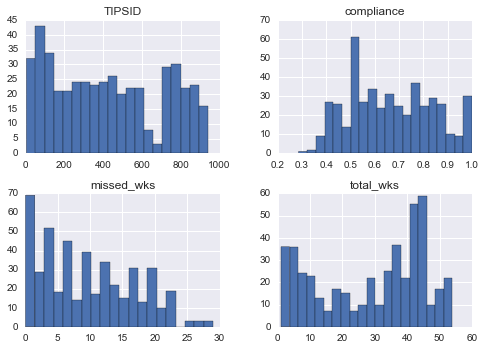

In [65]:
compliance_df[compliance_df['compliance']>0].hist(bins=20)

In [66]:
compliance_df[compliance_df['compliance']>0].describe()

,TIPSID,missed_wks,total_wks,compliance
count,467.000000,467.000000,467.000000,467.000000
mean,424.952891,9.695931,28.850107,0.663701
std,280.487593,7.152961,16.561467,0.175295
min,5.000000,0.000000,1.000000,0.285714
25%,161.500000,3.000000,11.000000,0.505814
50%,396.000000,9.000000,34.000000,0.659091
75%,714.000000,15.000000,43.000000,0.800000
max,939.000000,29.000000,54.000000,1.000000


In [67]:
compliance_df[compliance_df['compliance']>0].median()

TIPSID        396.000000
missed_wks      9.000000
total_wks      34.000000
compliance      0.659091
dtype: float64

In [72]:
initial_measures_df = pd.merge(compliance_df,merge_df,how='left',left_on=['TIPSID','first_measure_date'],right_on=['EndUserId','measure_date'])
initial_measures_df.head()

,TIPSID,missed_wks,total_wks,first_measure_date,compliance,EndUserId,measure_date,Systolic,Diastolic,HeartRate,BPHR_read_time,Weight,W_read_time,SP02,HeartRate_SP02,SPO2_read_time
0,5,11,52,2015-05-11,0.788462,5,2015-05-11,117,89,94.0,13:56:47,168.9,13:57:36,93,102,13:52:55
1,6,7,54,2015-05-12,0.870370,6,2015-05-12,106,65,75.0,14:13:52,141.3,14:14:46,96,82,14:12:04
2,7,6,13,2015-05-11,0.538462,7,2015-05-11,108,75,77.0,14:52:31,191.1,14:53:22,96,57,14:50:19
3,8,1,13,2015-05-18,0.923077,8,2015-05-18,117,64,68.0,15:23:17,321.7,15:24:07,95,77,15:20:25
4,9,28,50,2015-05-11,0.440000,9,2015-05-11,128,89,95.0,14:40:09,356.9,14:41:05,95,75,14:37:34


In [73]:
initial_measures_df.drop(['BPHR_read_time','W_read_time','measure_date','SPO2_read_time','EndUserId'],axis=1,inplace=True)
initial_measures_df.head()

,TIPSID,missed_wks,total_wks,first_measure_date,compliance,Systolic,Diastolic,HeartRate,Weight,SP02,HeartRate_SP02
0,5,11,52,2015-05-11,0.788462,117,89,94.0,168.9,93,102
1,6,7,54,2015-05-12,0.870370,106,65,75.0,141.3,96,82
2,7,6,13,2015-05-11,0.538462,108,75,77.0,191.1,96,57
3,8,1,13,2015-05-18,0.923077,117,64,68.0,321.7,95,77
4,9,28,50,2015-05-11,0.440000,128,89,95.0,356.9,95,75


In [75]:
initial_measures_df.to_csv('../data/initial_measures_compliance.csv',index=False)